## Model simulation: Chemical reactor with heat transfer

$$\frac{d[N_2O_5]}{dt}= -2A_re^{\frac{-E_{A}}{RT}}[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[N_2O_4]}{dt}= 2A_re^{\frac{-E_{A}}{RT}}[N_2O_5]+ \frac{Q}{V}({[N_2O_4]}_{in} - [N_2O_4])$$
$$\frac{d[T]}{dt}= \frac{Q \rho C_{p}(T_{in}-T)+UA(T_{w}-T)-VA_re^{\frac{-E_{A}}{RT}}[N_2O_5]\Delta_{r}H}{V \rho C_{p}}$$

In [15]:
%matplotlib inline

# Importing functionalities
import numpy as np
import scipy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt
from IPython.display import Image
from ipywidgets import interact, fixed, FloatSlider, IntSlider, ToggleButtons

%load_ext autoreload
%autoreload 1
import sys
import os
sys.path.append("functions")
%aimport general_functions


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
%aimport heat
function_derivatives = heat.model_derivatives

## Model simulation

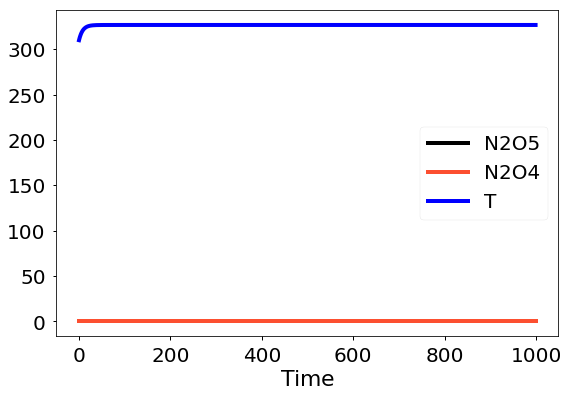

In [17]:
df = general_functions.model(
    np.arange(0, 1000, 1), # Timesteps
    [ 0, 0, 310], # Initial conditions
    ['N2O5','N2O4','T'], # Variable names
    function_derivatives, # Function derivatives
    returnDataFrame=True, plotresults=True,
    # Specify parameter values
    Ar=1.54e13, Ea=100320, Q=0.5, V=100, rho=0.79,
    Cp=52.82, U=250, A=2, delta_rH=-6000,
    N2O5_in=0.02, N2O4_in=0, Tin=250, Tw=330)

Since $T$ has different order of magnitude compared to $N_2O_5$ and $N_2O_4$, it is more logic to plot $T$ on a different scale (Please note that other colors are now used).

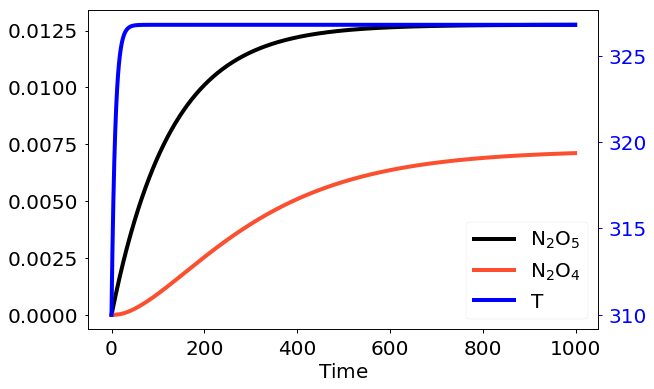

In [18]:
fig, ax1 = plt.subplots(figsize=(9,5))        # We prepare a graph
ax1_twin = ax1.twinx()                        # We ensure a double y-axis
plot_1= ax1.plot(df['N2O5'],label=r'$\mathrm{N_2O_5}$');  # We plot N2O5 on the 'twin'-axis 
plot_2 = ax1.plot(df['N2O4'],label=r'$\mathrm{N_2O_4}$');  # We plot N2O4 on the 'twin'-axis
plot_twin = ax1_twin.plot(df['T'], color='blue',label=r'$\mathrm{T}$')     # We plot v first in blue
ax1_twin.yaxis.label.set_color('blue')
ax1_twin.tick_params(axis='y', colors='blue')

plots = plot_1 + plot_2 + plot_twin
labs = [leg.get_label() for leg in plots]
ax1.legend(plots, labs, loc=4)
fig.tight_layout(pad=0.4, w_pad=1, h_pad=1.0)
ax1.set_xlabel(r'$\mathrm{Time}$', fontsize=20,rotation=0)
plt.show()

$$\frac{d[N_2O_5]}{dt}= -2A_re^{\frac{-E_{A}}{RT}}[N_2O_5] + \frac{Q}{V}({[N_2O_5]}_{in} - [N_2O_5])$$
$$\frac{d[N_2O_4]}{dt}= 2A_re^{\frac{-E_{A}}{RT}}[N_2O_5]+ \frac{Q}{V}({[N_2O_4]}_{in} - [N_2O_4])$$
$$\frac{d[T]}{dt}= \frac{Q \rho C_{p}(T_{in}-T)+UA(T_{w}-T)-VA_re^{\frac{-E_{A}}{RT}}[N_2O_5]\Delta_{r}H}{V \rho C_{p}}$$

## Impact of model parameters

Note that  ```twinax=True ``` to plot Temperature on a secondary axis.

In [19]:
interact(general_functions.model,
         timesteps=fixed(np.arange(0, 1000, 1)),
         init=fixed([ 0, 0, 310]), varnames=fixed([r'$N_2O_5$',r'$N_2O_4$',r'$\mathrm{T}$']),
         f=fixed(function_derivatives),
         returnDataFrame=fixed(False), plotresults=fixed(True),twinax=fixed(True),
         N2O5_in=fixed(0.01), N2O4_in=fixed(0),
         Q=FloatSlider(value=0.5, min=0, max=5, step=.5, name=r'$Q$', continuous_update=False),
         V=FloatSlider(value=100, min=0, max=1000, step=10, name=r'$V$', continuous_update=False),
         U=FloatSlider(value=250, min=0, max=1000, step=50, name=r'$U$', continuous_update=False),
         A=FloatSlider(value=2, min=0, max=10, step=0.5, name=r'$A$', continuous_update=False),
         delta_rH=FloatSlider(value=-6000, min=-10000, max=6000, step=1000, name=r'$\Delta_{r}H$', continuous_update=False),
         Ea=FloatSlider(value=100320, min=98000, max=102000, step=100, name=r'$E_a$', continuous_update=False),
         Ar=FloatSlider(value=1.54e13, min=5e12, max=5e13, step=1e12, name=r'$A_r$', continuous_update=False),
         rho=FloatSlider(value=0.79, min=0.5, max=1, step=0.01, name=r'$\rho$', continuous_update=False),
         Cp=FloatSlider(value=52.82, min=40, max=75, step=1, name=r'$C_p$', continuous_update=False),
         Tin=FloatSlider(value=250, min=200, max=300, step=10, name=r'$T_{in}$', continuous_update=False),
         Tw=FloatSlider(value=330, min=300, max=350, step=10, name=r'$T_w$', continuous_update=False));

interactive(children=(FloatSlider(value=0.5, continuous_update=False, description='Q', max=5.0, step=0.5), Flo…

# Sensitivity analysis of the heat balance model

In [20]:
interact(general_functions.sensitivity,
    timesteps=fixed(np.arange(0, 1000, 1)), # timesteps
    init=fixed([ 0, 0, 310]), # Initial conditions
    varnames=fixed(['N2O5','N2O4','T']), # Variable names
    f=fixed(function_derivatives), # Name of function derivatives
    parametername=ToggleButtons(options=['Ar', 'Ea', 'Q', 'V', 'rho', 'Cp',
                                        'U', 'A', 'delta_rH', 'N2O5_in',
                                        'N2O4_in', 'Tin', 'Tw']),
    log_perturbation = IntSlider(value=-4, min=-15, max=-1, step=1, continuous_update=False),
    sort=ToggleButtons(options=[
            'absolute sensitivity', 'relative sensitivity parameter',
            'relative sensitivity variable','relative total sensitivity']),
    # Specify parameter values
    Ar=fixed(1.54e13), Ea=fixed(100320), Q=fixed(0.5), V=fixed(100), rho=fixed(0.79),
    Cp=fixed(52.82), U=fixed(250), A=fixed(2), delta_rH=fixed(-6000),
    N2O5_in=fixed(0.02), N2O4_in=fixed(0), Tin=fixed(250), Tw=fixed(330));

interactive(children=(ToggleButtons(description='parametername', options=('Ar', 'Ea', 'Q', 'V', 'rho', 'Cp', '…